In [2]:
import matplotlib.pyplot as plt
from interp import *
from prettytable import PrettyTable
from splines import *

# Lagrnange's Interpolation polynomial

+-------+--------+------------------------+------------------------+
| nodes | points |      Ln deviation      |    Loptn deviation     |
+-------+--------+------------------------+------------------------+
|   3   |  1000  |    0.46862696124047    |   1.1015971916165415   |
|   5   |  1000  |  0.15806492200807465   |   0.5054938681583099   |
|   13  |  1000  |  0.008072627218268735  |  0.022478627809717988  |
|   17  |  1000  |  0.002376927994243383  |  0.004453207509003798  |
|   24  |  1000  | 0.00033025325445890097 | 0.00024411661797274498 |
|   31  |  1000  | 5.188058671379281e-05  | 1.2602525005789289e-05 |
|   38  |  1000  | 8.784812230766548e-06  | 6.253518725074514e-07  |
|   45  |  1000  | 4.111852693000628e-06  | 3.017766081470086e-08  |
|  100  |  1000  |   32877656825.395523   | 6.046274592108603e-13  |
+-------+--------+------------------------+------------------------+


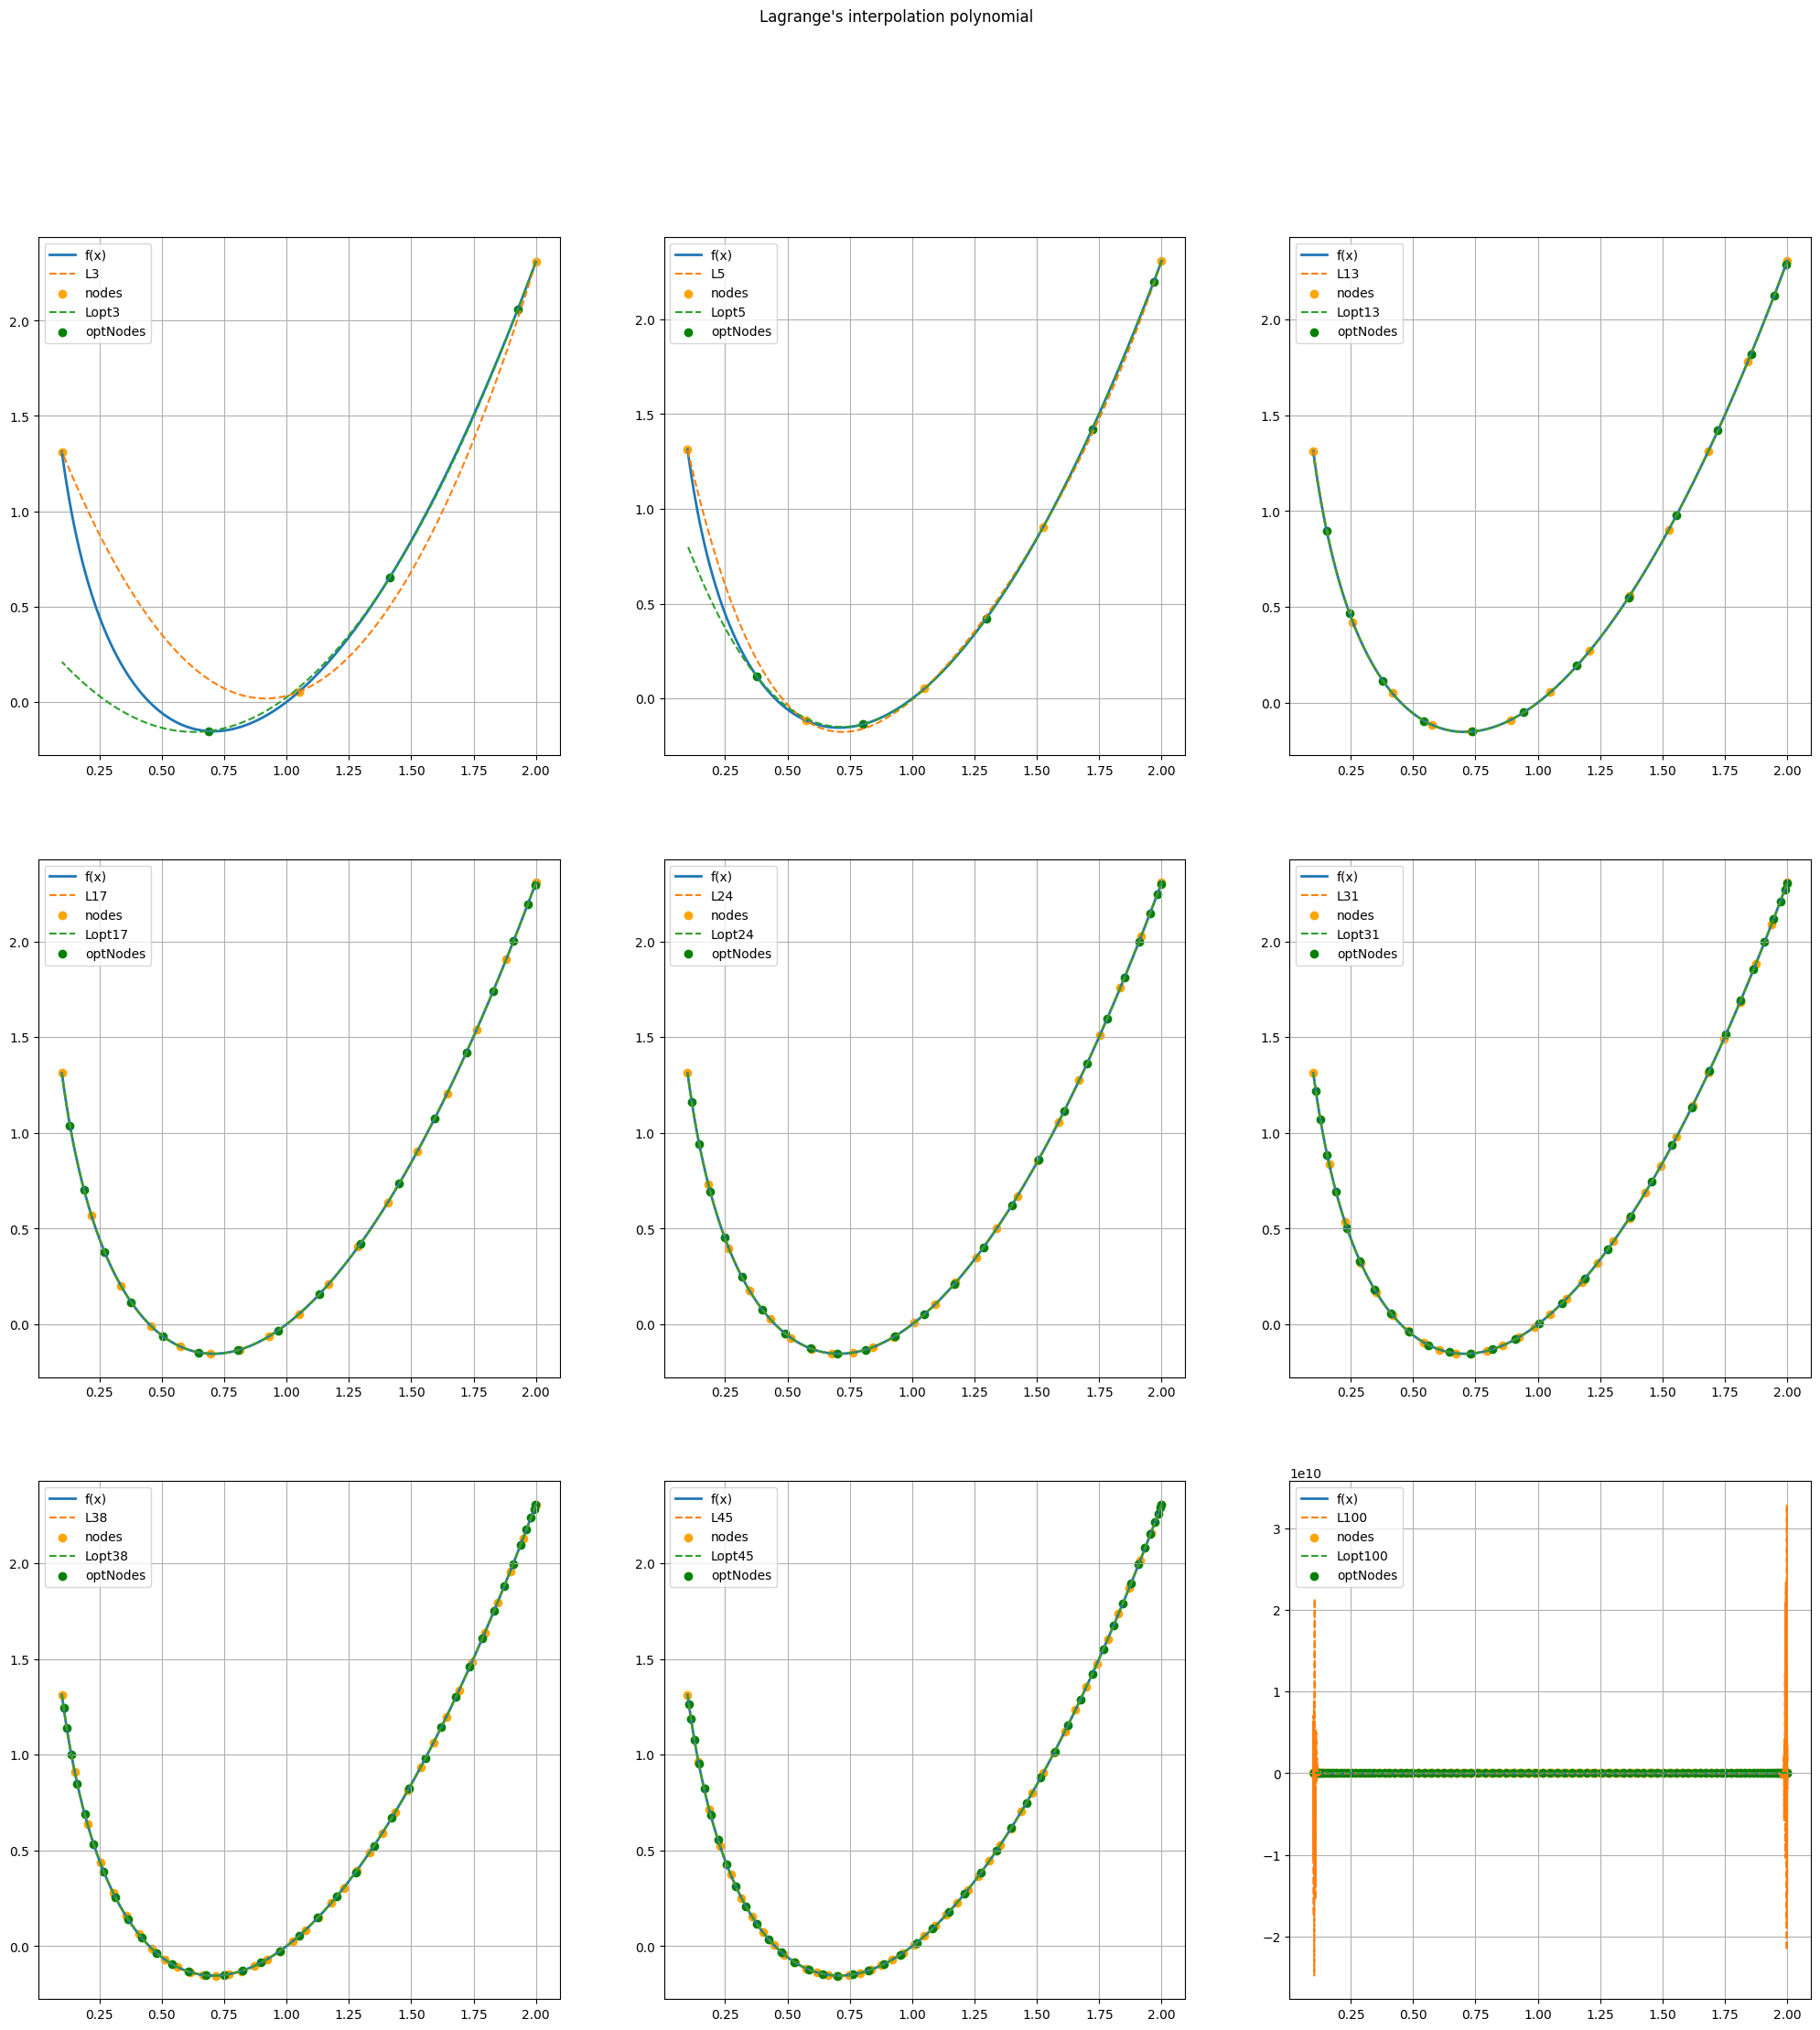

In [6]:
n = [3,5,13,17,24,31,38,45,100]
a = 0.1
b = 2
fig,axes=plt.subplots(3,3,figsize=(25,25))
fig.suptitle("Lagrange's interpolation polynomial")
output = PrettyTable()
output.field_names = ['nodes', 'points', 'Ln deviation','Loptn deviation']

for i in range(len(n)):
    row, col = divmod(i,3)
    ax = axes[row, col]

    x = opt_nodes(a,b,1000)
    y = [f(x[i]) for i in range(1000)]
    ax.plot(x, y, label = 'f(x)', linewidth = 2)

    x_argN = nodes(a, b, n[i])
    y_argN = [f(k) for k in x_argN]
    y_nodes = [Ln(x[j], a, b, n[i]) for j in range(len(x))]
    ax.plot(x, y_nodes, linestyle = '--', label = f'L{n[i]}')
    ax.scatter(x_argN, y_argN, color = 'orange', label = 'nodes')

    x_argOn = opt_nodes(a, b, n[i])
    y_argOn = [f(k) for k in x_argOn]
    y_optNodes = [Loptn(x[j], a, b, n[i]) for j in range(len(x))]
    ax.plot(x,y_optNodes,linestyle = '--', label = f'Lopt{n[i]}')
    ax.scatter(x_argOn, y_argOn, color = 'green', label = 'optNodes')

    ax.legend()
    ax.grid()

    mas = [n[i], 1000, max_dev(y, y_nodes), max_dev(y, y_optNodes)]
    output.add_row(mas)
print(output)

# Newton's interpolation polynomial

+-------+--------+------------------------+------------------------+
| nodes | points |      Nn deviation      |    Noptn deviation     |
+-------+--------+------------------------+------------------------+
|   3   |  1000  |   0.4686269612404701   |   1.101597191616541    |
|   5   |  1000  |  0.15806492200807476   |   0.5054938681583114   |
|   13  |  1000  |  0.008072627218267403  |   0.022478627809702    |
|   17  |  1000  |  0.002376927994253819  |  0.004453207509011126  |
|   24  |  1000  | 0.00033025325479441037 | 0.0002441166179718568  |
|   31  |  1000  | 5.188057276983571e-05  |  1.26025250053452e-05  |
|   38  |  1000  | 8.784571537967523e-06  | 6.253518853860385e-07  |
|   45  |  1000  | 2.664733939949926e-06  | 3.0174316822950686e-08 |
|  100  |  1000  |   25736984225913.21    | 2.0925116196564412e+16 |
+-------+--------+------------------------+------------------------+


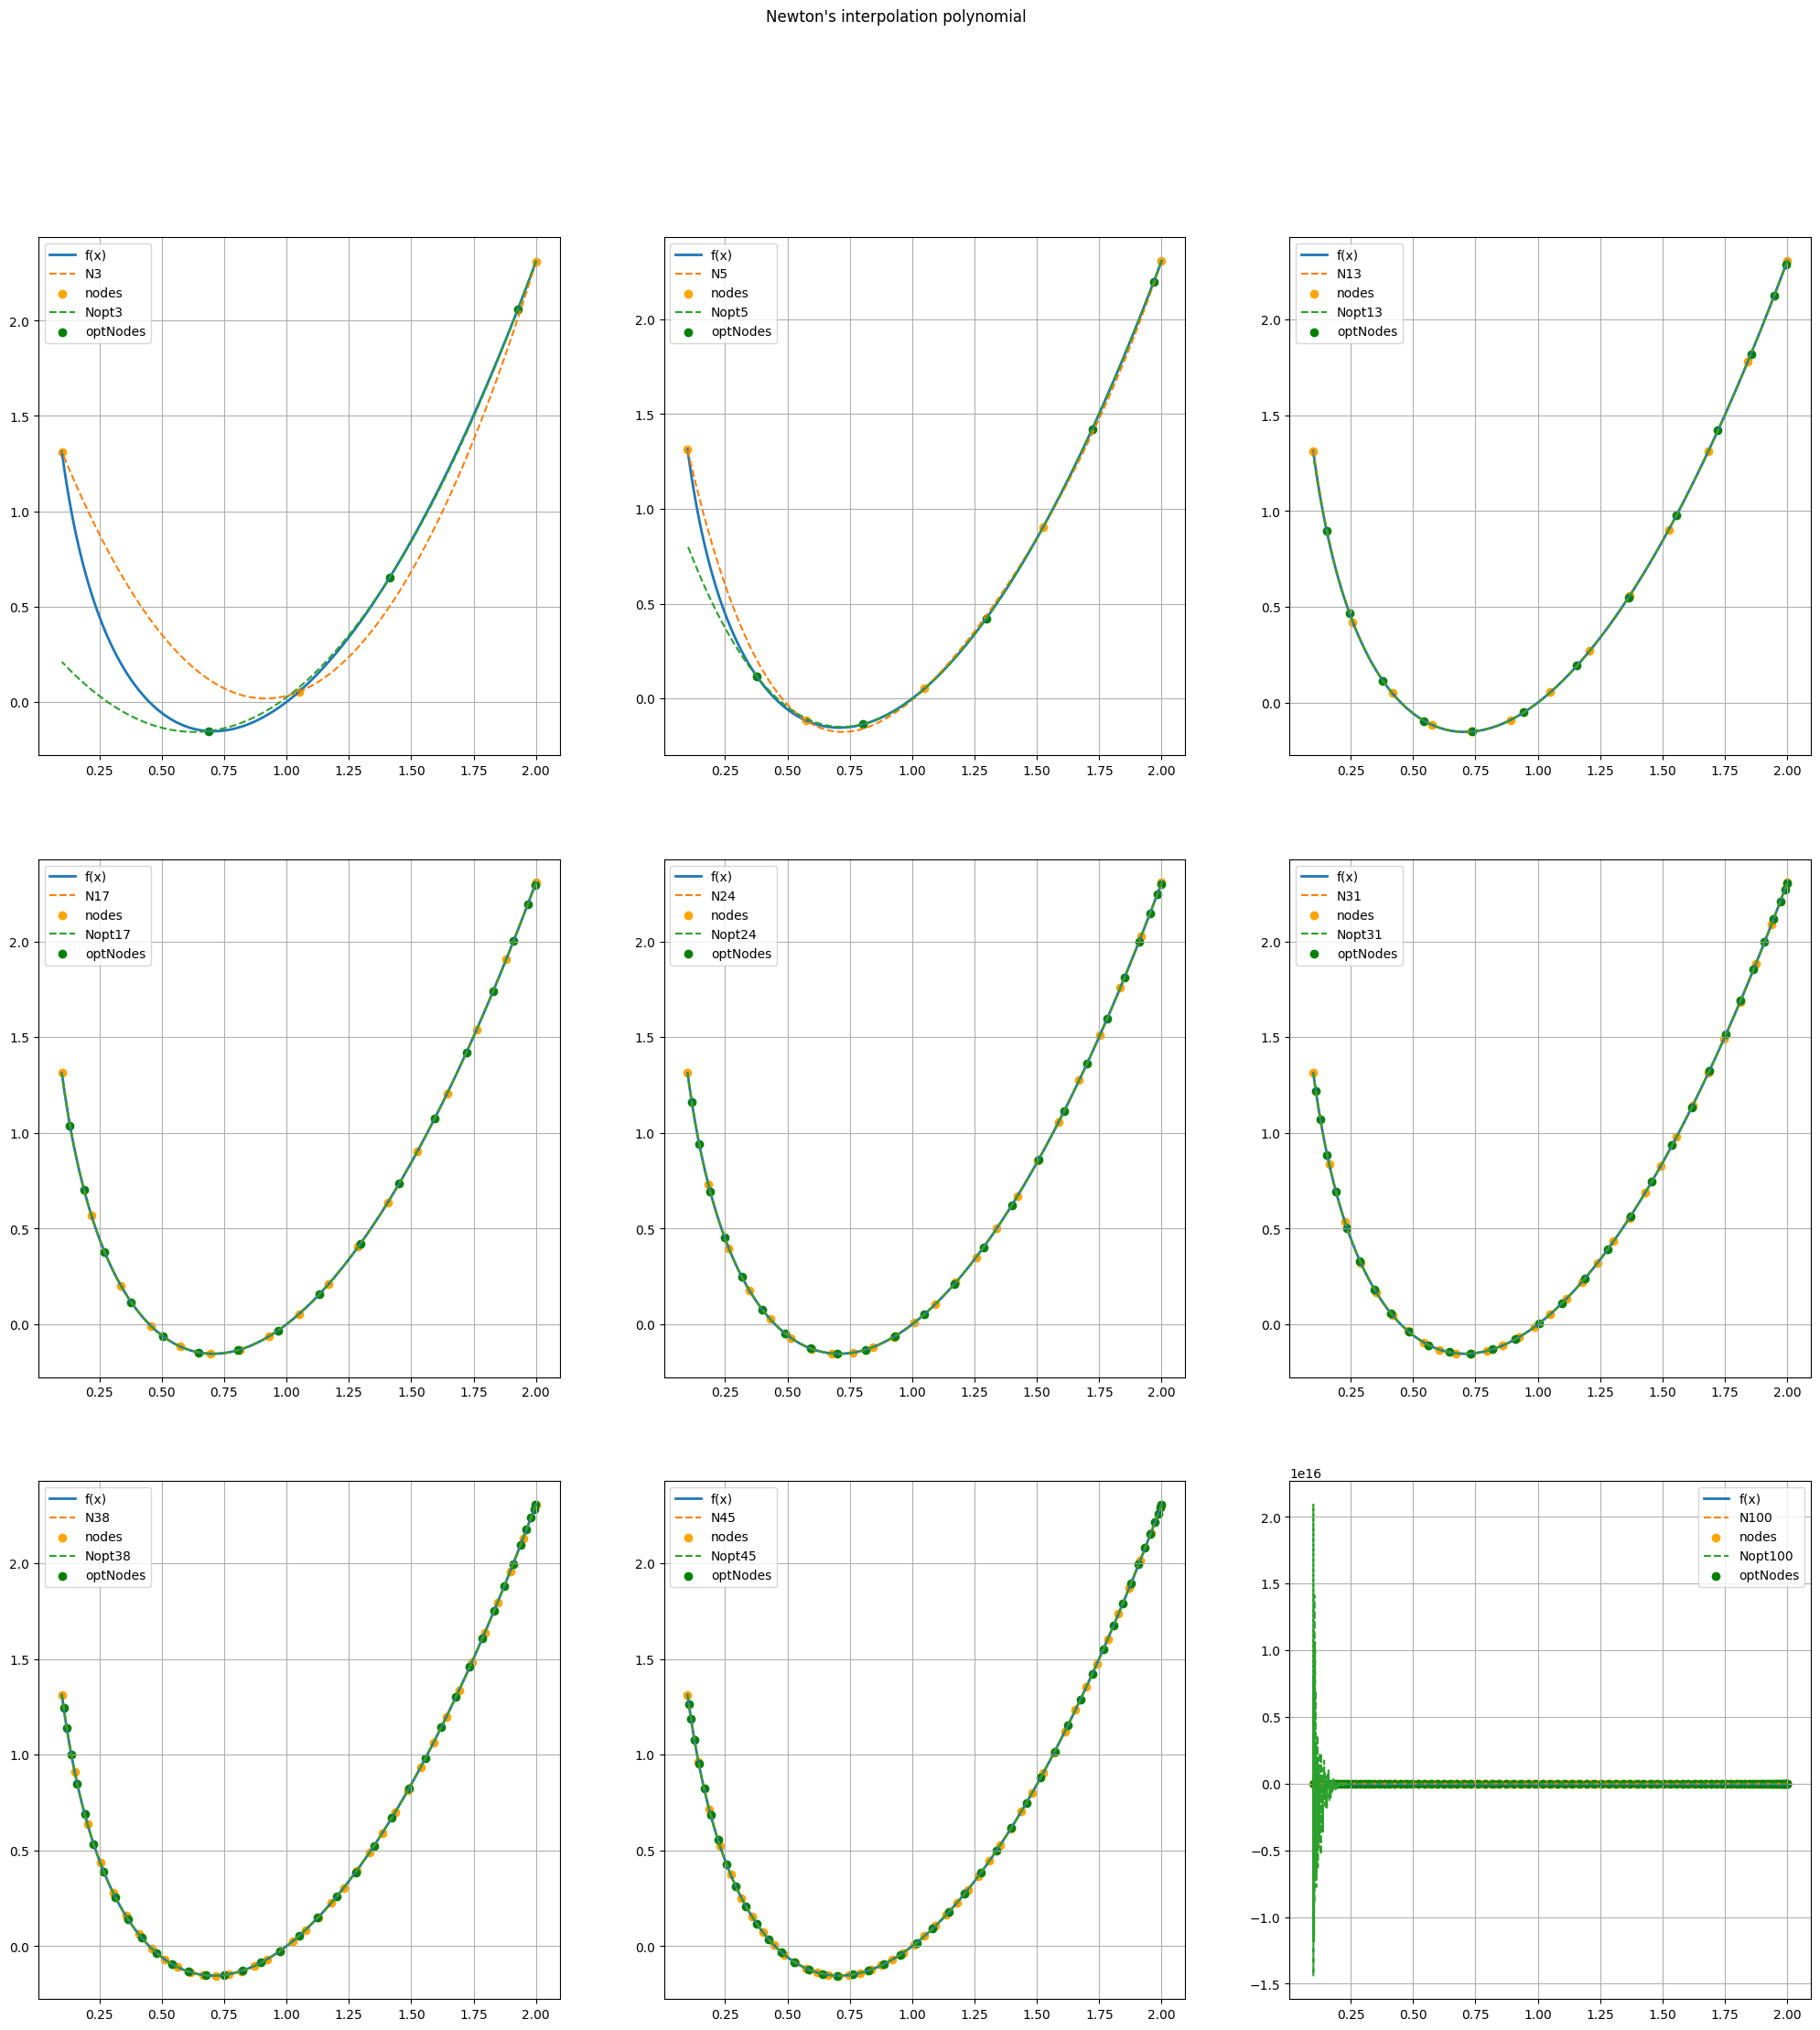

In [7]:
n = [3,5,13,17,24,31,38,45,100]
a = 0.1
b = 2
fig,axes=plt.subplots(3,3,figsize=(25,25))
fig.suptitle("Newton's interpolation polynomial")
output = PrettyTable()
output.field_names = ['nodes', 'points', 'Nn deviation','Noptn deviation']

for i in range(len(n)):
    row, col = divmod(i,3)
    ax = axes[row, col]

    x = opt_nodes(a,b,1000)
    y = [f(x[i]) for i in range(1000)]
    ax.plot(x, y, label = 'f(x)', linewidth = 2)

    x_argN = nodes(a, b, n[i])
    y_argN = [f(k) for k in x_argN]
    y_nodes = [Nn(x[j], a, b, n[i]) for j in range(len(x))]
    ax.plot(x, y_nodes, linestyle = '--', label = f'N{n[i]}')
    ax.scatter(x_argN, y_argN, color = 'orange', label = 'nodes')

    x_argOn = opt_nodes(a, b, n[i])
    y_argOn = [f(k) for k in x_argOn]
    y_optNodes = [Noptn(x[j], a, b, n[i]) for j in range(len(x))]
    ax.plot(x,y_optNodes,linestyle = '--', label = f'Nopt{n[i]}')
    ax.scatter(x_argOn, y_argOn, color = 'green', label = 'optNodes')

    ax.legend()
    ax.grid()

    mas = [n[i], 1000, max_dev(y, y_nodes), max_dev(y, y_optNodes)]
    output.add_row(mas)
print(output)

# Linear Spline

+-------+--------+----------------------+
| nodes | points |    RSn deviation     |
+-------+--------+----------------------+
|   3   |  1000  |  0.8477818579625499  |
|   5   |  1000  |  0.4198652288416421  |
|   13  |  1000  | 0.11733407252644068  |
|   17  |  1000  |  0.0794107171497822  |
|   24  |  1000  | 0.04678984676352749  |
|   31  |  1000  | 0.030983256935066983 |
|   38  |  1000  | 0.022073933517811062 |
|   45  |  1000  | 0.016538288907391285 |
|  100  |  1000  | 0.00394300930420366  |
+-------+--------+----------------------+


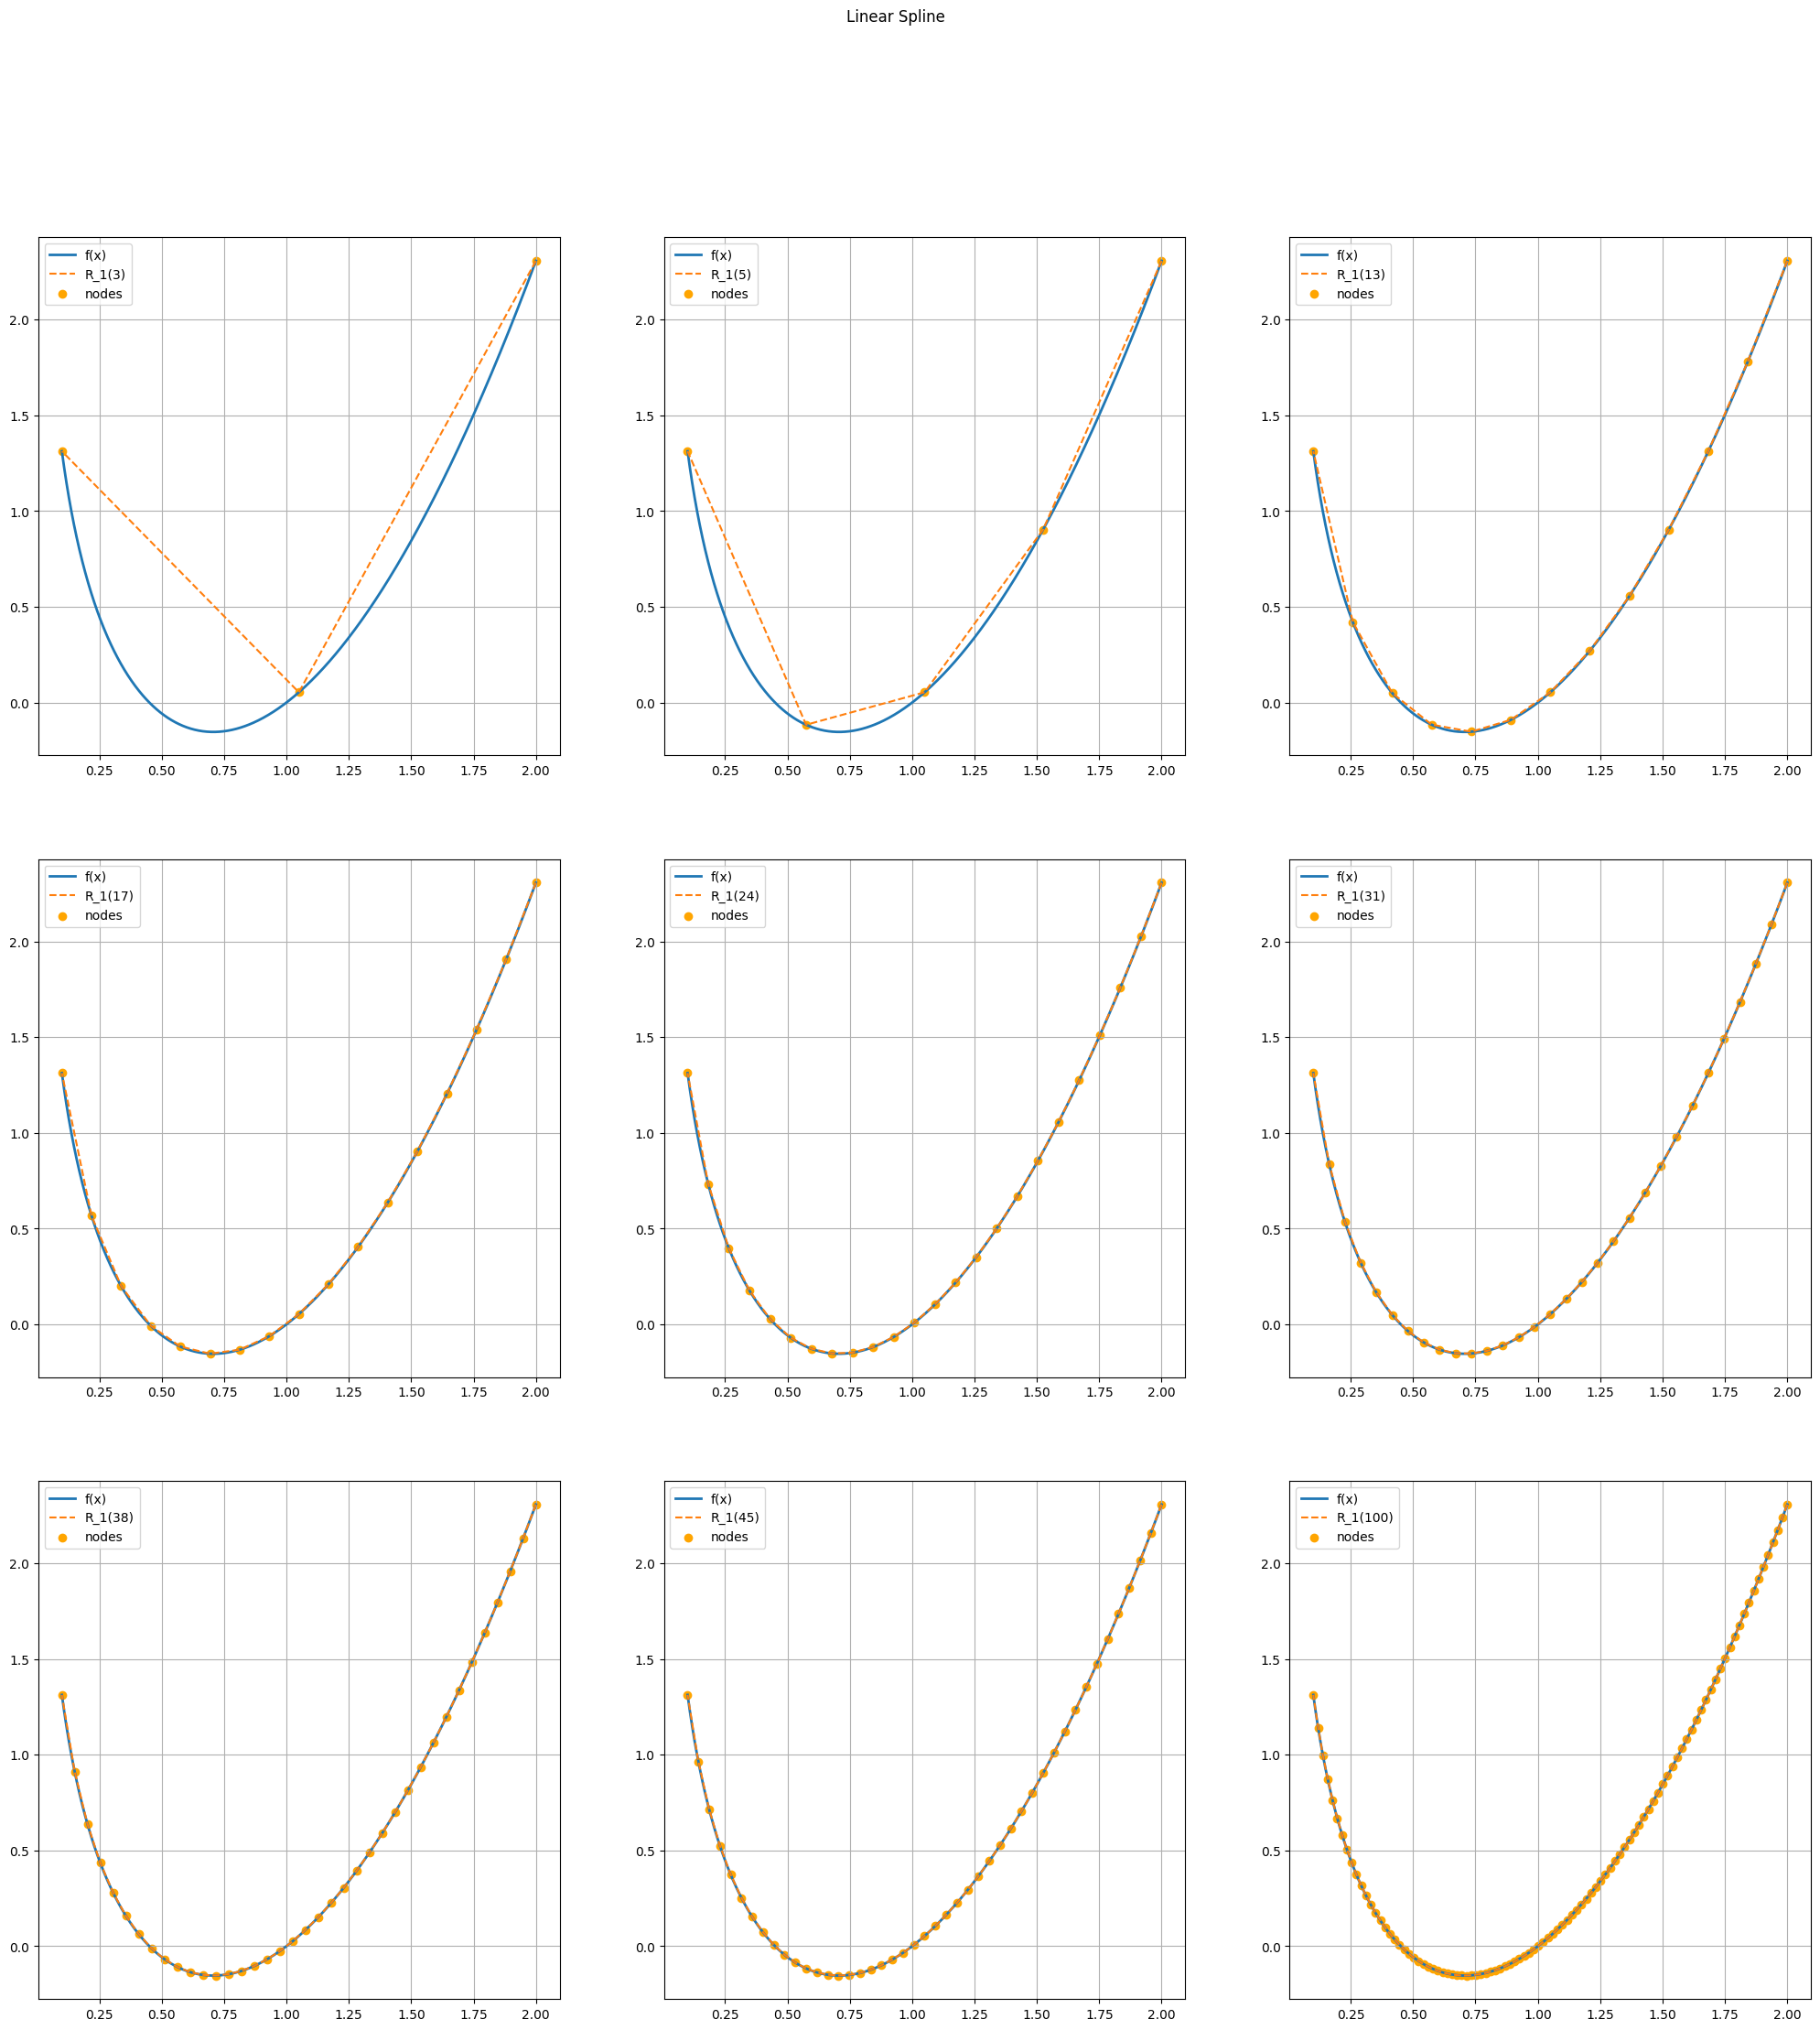

In [8]:
n = [3,5,13,17,24,31,38,45,100]
a = 0.1
b = 2
fig,axes=plt.subplots(3,3,figsize=(25,25))
fig.suptitle("Linear Spline")
output = PrettyTable()
output.field_names = ['nodes', 'points', 'RSn deviation',]

for i in range(len(n)):
    row, col = divmod(i,3)
    ax = axes[row, col]

    x = opt_nodes(a,b,1000)
    y = [f(x[i]) for i in range(1000)]
    ax.plot(x, y, label = 'f(x)', linewidth = 2)

    coefs = LS(a,b,n[i])
    x_argN = nodes(a, b, n[i])
    y_argN = [f(k) for k in x_argN]
    y_nodes = [LinearSpline(x[j], coefs, x_argN, n[i]) for j in range(len(x))]
    ax.plot(x, y_nodes, linestyle = '--', label = f'R_1({n[i]})')
    ax.scatter(x_argN, y_argN, color = 'orange', label = 'nodes')

    ax.legend()
    ax.grid()

    mas = [n[i], 1000, max_dev(y, y_nodes)]
    output.add_row(mas)
print(output)

# Square Spline

+-------+--------+-----------------------+
| nodes | points |     RSn deviation     |
+-------+--------+-----------------------+
|   3   |  1000  |   0.6847078699468392  |
|   5   |  1000  |  0.23333066001450092  |
|   13  |  1000  |  0.11206487296318535  |
|   17  |  1000  |  0.05091251746859671  |
|   24  |  1000  |  0.026672733790381375 |
|   31  |  1000  |   0.0173197446789346  |
|   38  |  1000  |  0.012311255153937273 |
|   45  |  1000  |  0.009244973730709871 |
|  100  |  1000  | 0.0022499858517912585 |
+-------+--------+-----------------------+


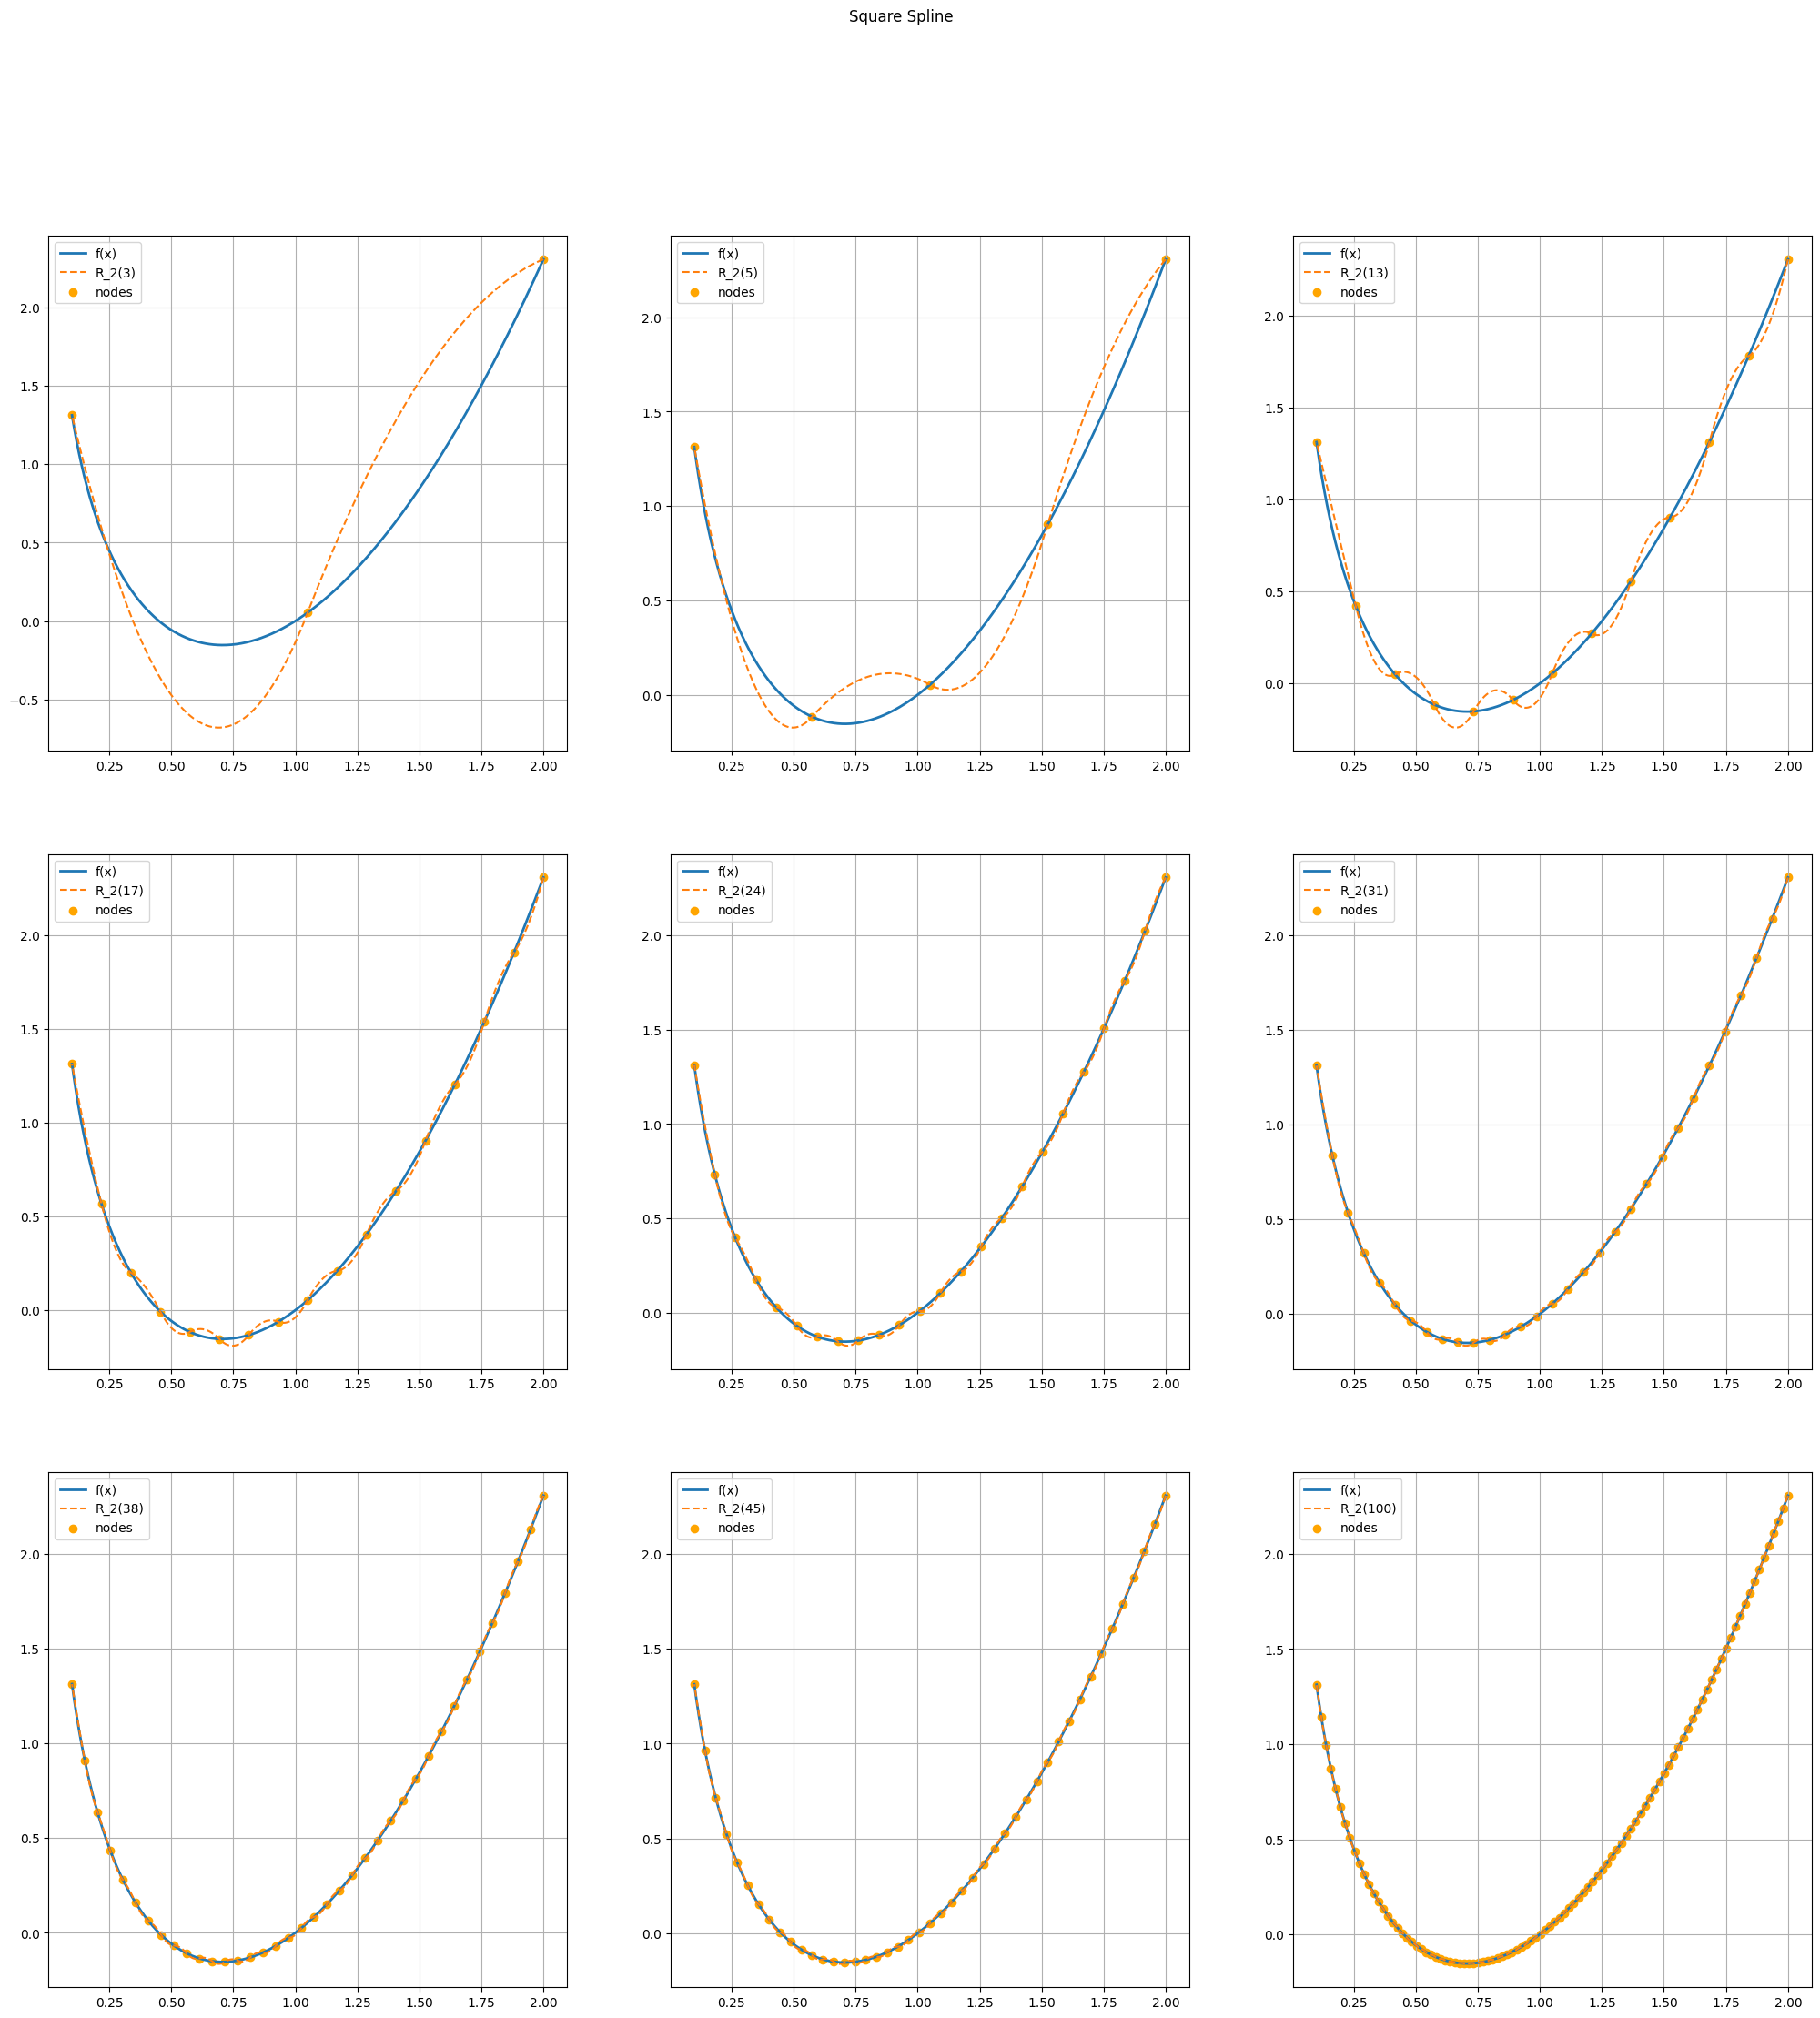

In [9]:
n = [3,5,13,17,24,31,38,45,100]
a = 0.1
b = 2
fig,axes=plt.subplots(3,3,figsize=(25,25))
fig.suptitle("Square Spline")
output = PrettyTable()
output.field_names = ['nodes', 'points', 'RSn deviation',]

for i in range(len(n)):
    row, col = divmod(i,3)
    ax = axes[row, col]

    x = opt_nodes(a,b,1000)
    y = [f(x[i]) for i in range(1000)]
    ax.plot(x, y, label = 'f(x)', linewidth = 2)

    coefs = SqS(a,b,n[i])
    x_argN = nodes(a, b, n[i])
    y_argN = [f(k) for k in x_argN]
    y_nodes = [SquareSpline(x[j], coefs, x_argN, n[i]) for j in range(len(x))]
    ax.plot(x, y_nodes, linestyle = '--', label = f'R_2({n[i]})')
    ax.scatter(x_argN, y_argN, color = 'orange', label = 'nodes')

    ax.legend()
    ax.grid()

    mas = [n[i], 1000, max_dev(y, y_nodes)]
    output.add_row(mas)
print(output)

# Cubic Spline

+-------+--------+-----------------------+
| nodes | points |     RSn deviation     |
+-------+--------+-----------------------+
|   5   |  1000  |   0.3021767773894619  |
|   13  |  1000  |  0.07548783952958804  |
|   17  |  1000  |  0.04881624762275649  |
|   24  |  1000  |  0.027015264387355575 |
|   31  |  1000  |  0.01705997045185348  |
|   38  |  1000  |  0.011709069383084802 |
|   45  |  1000  |  0.008516169931323203 |
|   70  |  1000  | 0.0036330996721904985 |
|  100  |  1000  |  0.001801870100326619 |
+-------+--------+-----------------------+


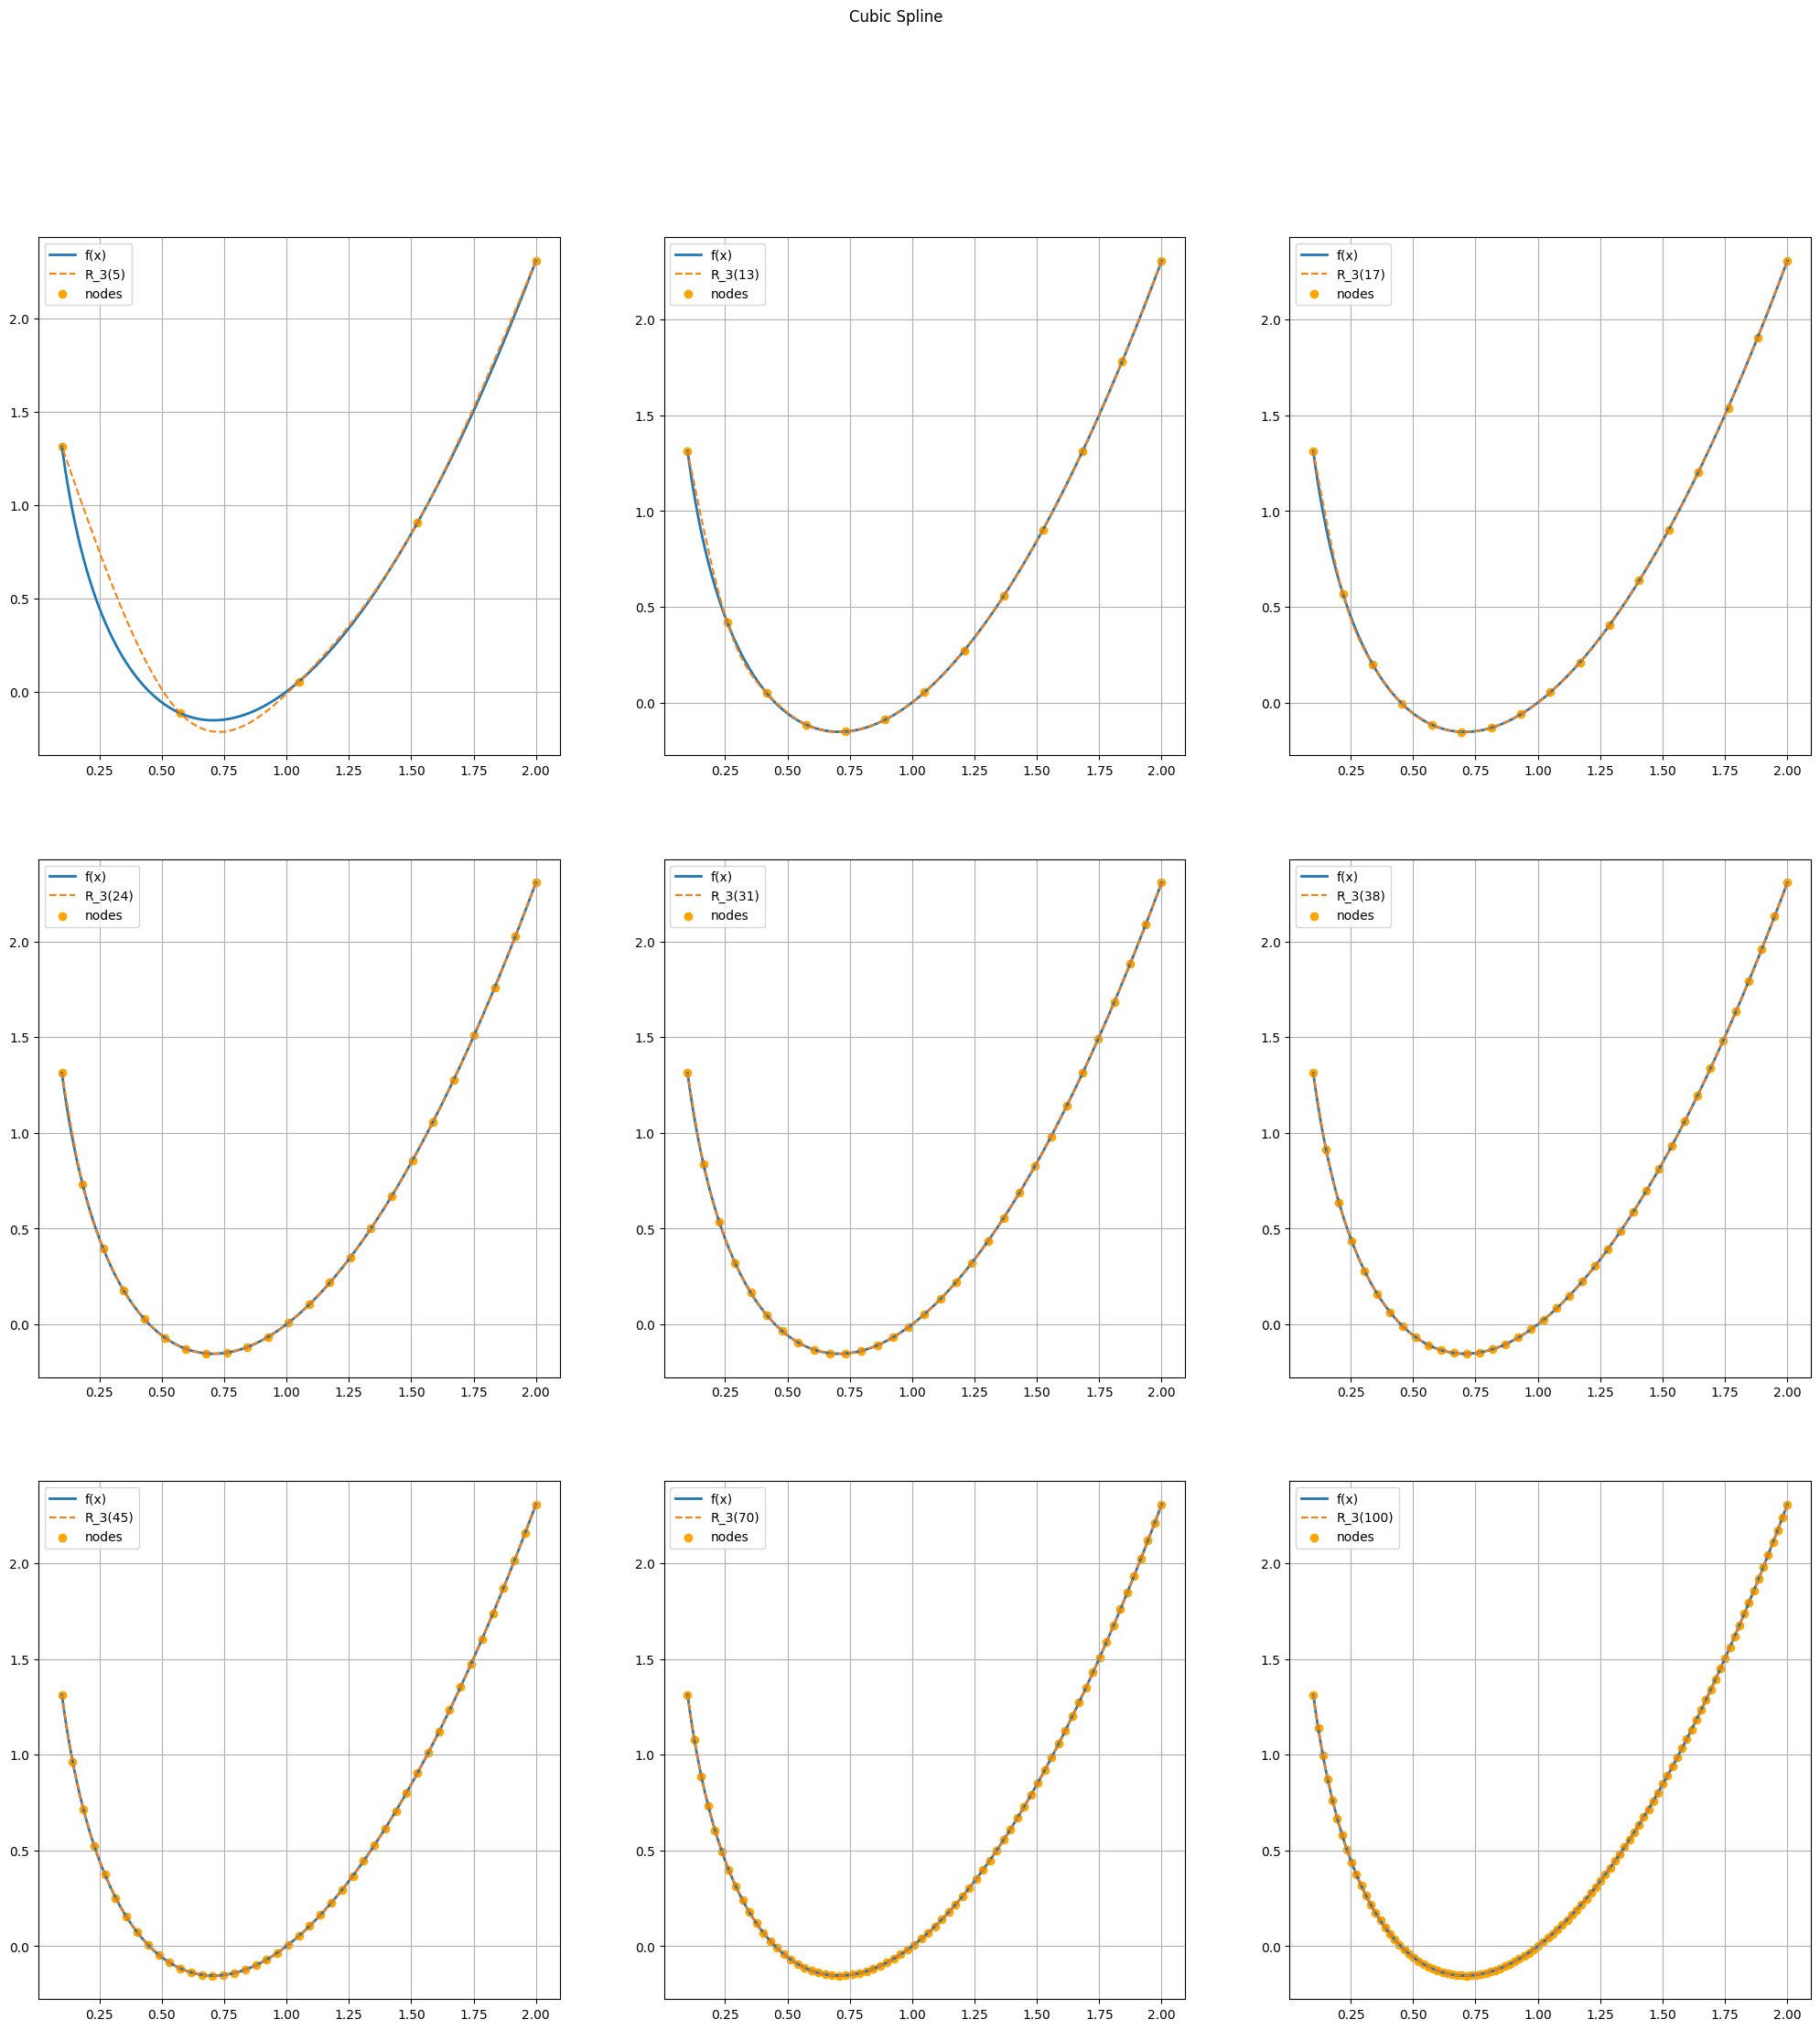

In [3]:
n = [5,13,17,24,31,38,45, 70, 100]
a = 0.1
b = 2
fig,axes=plt.subplots(3,3,figsize=(25,25))
fig.suptitle("Cubic Spline")
output = PrettyTable()
output.field_names = ['nodes', 'points', 'RSn deviation',]

for i in range(len(n)):
    row, col = divmod(i,3)
    ax = axes[row, col]

    x = opt_nodes(a,b,1000)
    y = [f(x[i]) for i in range(1000)]
    ax.plot(x, y, label = 'f(x)', linewidth = 2)

    coefs = CbS(a,b,n[i])
    x_argN = nodes(a, b, n[i])
    y_argN = [f(k) for k in x_argN]
    y_nodes = [CubicSpline(x[j], coefs, x_argN, n[i]) for j in range(len(x))]
    ax.plot(x, y_nodes, linestyle = '--', label = f'R_3({n[i]})')
    ax.scatter(x_argN, y_argN, color = 'orange', label = 'nodes')

    ax.legend()
    ax.grid()

    mas = [n[i], 1000, max_dev(y, y_nodes)]
    output.add_row(mas)
print(output)

# Absolute Error

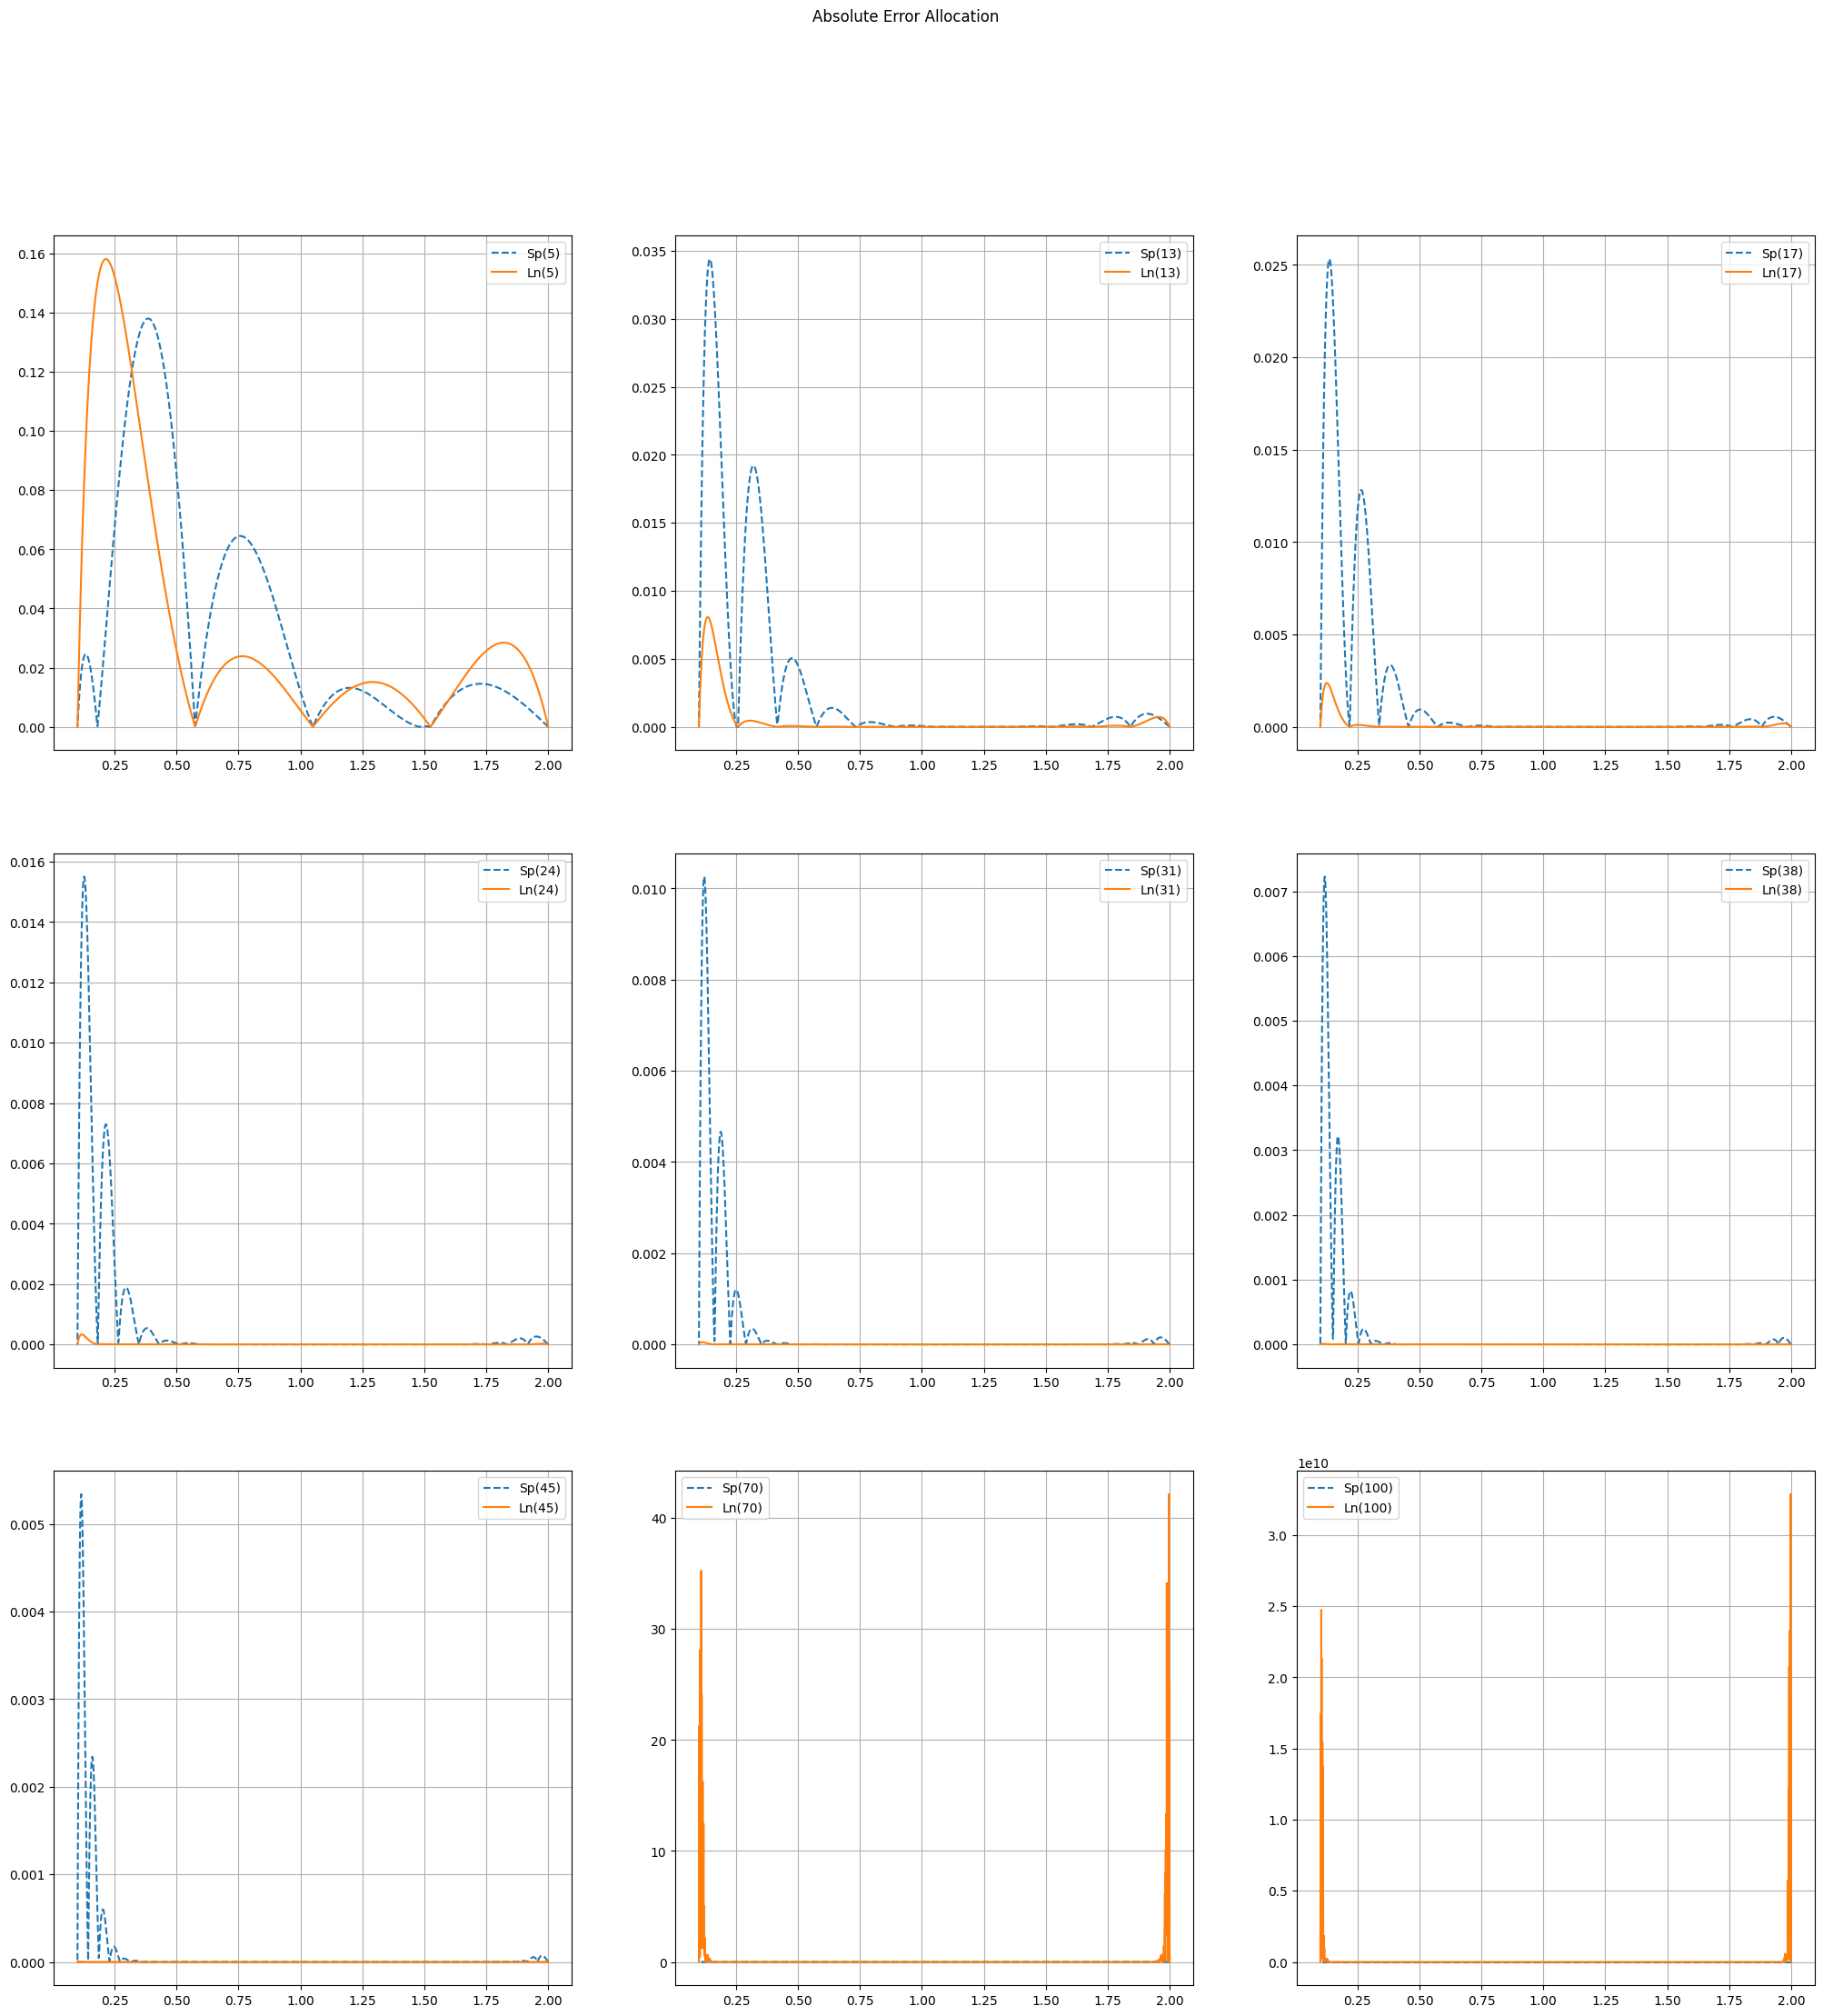

In [15]:
n = [5,13,17,24,31,38,45, 70, 100]
a = 0.1
b = 2
fig,axes=plt.subplots(3,3,figsize=(25,25))
fig.suptitle("Absolute Error Allocation")

for i in range(len(n)):
    row, col = divmod(i,3)
    ax = axes[row, col]

    x = opt_nodes(a,b,1000)
    y = [f(x[i]) for i in range(1000)]
    values = nodes(a, b, n[i])
    coefsSp = CbS(a,b,n[i])
    f_spline = [CubicSpline(t, coefsSp, values, n[i]) for t in x]
    f_lagr = [Ln(t, a, b, n[i]) for t in x]

    errorSp = abs_error(y, f_spline, 1000)
    errorLn = abs_error(y, f_lagr, 1000)

    ax.plot(x, errorSp, linestyle = '--', label = f'Sp({n[i]})')
    ax.plot(x, errorLn, linestyle = '-', label = f'Ln({n[i]})')

    ax.legend()
    ax.grid()